In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np
from tqdm import tqdm
from scipy import stats
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
assessments = pd.read_csv('./dataset/anonymised_data/assessments.csv')
courses = pd.read_csv('./dataset/anonymised_data/courses.csv')
studentAssessment = pd.read_csv('./dataset/anonymised_data/studentAssessment.csv')
studentInfo = pd.read_csv('./dataset/anonymised_data/studentInfo.csv')
studentRegistration = pd.read_csv('./dataset/anonymised_data/studentRegistration.csv')
studentVle = pd.read_csv('./dataset/anonymised_data/studentVle.csv', nrows=999999)
vle = pd.read_csv('./dataset/anonymised_data/vle.csv')

In [6]:
set1 = list(assessments.columns.values)
set2 = list(courses.columns.values)
set3 = list(studentAssessment.columns.values)
set4 = list(studentInfo.columns.values)
set5 = list(studentRegistration.columns.values)
set6 = list(studentVle.columns.values)
set7 = list(vle.columns.values)
set1

['code_module',
 'code_presentation',
 'id_assessment',
 'assessment_type',
 'date',
 'weight']

In [7]:
all_columns = [set1, set2, set3, set4, set5, set6, set7]
columns_count = [assessments.shape,courses.shape,studentAssessment.shape, studentInfo.shape, studentRegistration.shape, studentVle.shape, vle.shape]
columns_header = ['assessments', 'courses', 'studentAssessment', 'studentInfo', 'studentRegistration', 'studentVle', 'vle' ] 

In [8]:
d = {'Table Name':columns_header,'Rows, Columns': columns_count,'Column Names':all_columns}
df = pd.set_option('max_colwidth', 200)
df = pd.DataFrame(d)
df

,Table Name,"Rows, Columns",Column Names
0,assessments,"(206, 6)","[code_module, code_presentation, id_assessment, assessment_type, date, weight]"
1,courses,"(22, 3)","[code_module, code_presentation, module_presentation_length]"
2,studentAssessment,"(173912, 5)","[id_assessment, id_student, date_submitted, is_banked, score]"
3,studentInfo,"(32593, 12)","[code_module, code_presentation, id_student, gender, region, highest_education, imd_band, age_band, num_of_prev_attempts, studied_credits, disability, final_result]"
4,studentRegistration,"(32593, 5)","[code_module, code_presentation, id_student, date_registration, date_unregistration]"
5,studentVle,"(999999, 6)","[code_module, code_presentation, id_student, id_site, date, sum_click]"
6,vle,"(6364, 6)","[id_site, code_module, code_presentation, activity_type, week_from, week_to]"


# Cleaning the data

In [9]:
# Dropping all the missing values
assessments.dropna(inplace=True)
courses.dropna(inplace=True)
studentAssessment.dropna(inplace=True)
studentInfo.dropna(inplace=True)
# studentRegistration.dropna(inplace=True)
studentVle.dropna(inplace=True)
vle.dropna(inplace=True)

In [10]:
columns_count = [assessments.shape,courses.shape,studentAssessment.shape, studentInfo.shape, studentRegistration.shape, studentVle.shape, vle.shape]
d = {'Table Name':columns_header,'Rows, Columns': columns_count,'Column Names':all_columns}
df = pd.set_option('max_colwidth', 200)
df = pd.DataFrame(d)
df

,Table Name,"Rows, Columns",Column Names
0,assessments,"(195, 6)","[code_module, code_presentation, id_assessment, assessment_type, date, weight]"
1,courses,"(22, 3)","[code_module, code_presentation, module_presentation_length]"
2,studentAssessment,"(173739, 5)","[id_assessment, id_student, date_submitted, is_banked, score]"
3,studentInfo,"(31482, 12)","[code_module, code_presentation, id_student, gender, region, highest_education, imd_band, age_band, num_of_prev_attempts, studied_credits, disability, final_result]"
4,studentRegistration,"(32593, 5)","[code_module, code_presentation, id_student, date_registration, date_unregistration]"
5,studentVle,"(999999, 6)","[code_module, code_presentation, id_student, id_site, date, sum_click]"
6,vle,"(1121, 6)","[id_site, code_module, code_presentation, activity_type, week_from, week_to]"


# Data Analysis - Based on Final Result for StudentInfo Table

Analysis to understand the distribution of the Quasi-identifying attributes.[1] The 6 main attributes identified are gender, disability, age, highest education, region, imd band. These can be used to understand the final result.
 
[1] https://www.nature.com/articles/sdata2017171

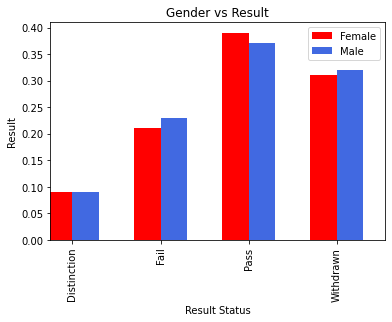

In [9]:
# Results based on Gender
# studentInfo
gender = studentInfo.groupby(['gender'],as_index = False)
# gender.count()
gender_count = gender['id_student'].count()
# gender_count
result_gender = studentInfo.groupby(['gender', 'final_result'],as_index = False)
# result_gender.count()
result_gender_count = result_gender['id_student'].count()
# result_gender_count
merge = pd.merge(gender_count, result_gender_count, on = 'gender', how = 'left')
# merge
merge['i'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge
merge = merge[['gender','final_result', 'i']]
merge
female = merge.loc[merge['gender'] == 'F']
# female
male = merge.loc[merge['gender'] == 'M']

fig = plt.figure() 

ax = fig.add_subplot(111) 

female.set_index('final_result',drop=True,inplace=True)
# female
male.set_index('final_result',drop=True,inplace=True)
female.plot(kind='bar',color='red', ax=ax, width= 0.3, position=1)
male.plot(kind='bar', color='royalblue', ax=ax, width= 0.3, position=0)

plt.xlabel('Result Status')
plt.ylabel('Result')
plt.title('Gender vs Result')
plt.legend(['Female', 'Male'])
plt.show()

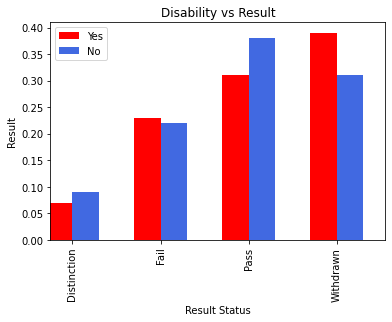

In [10]:
#Results based on Disability

disability_ = studentInfo.groupby(['disability'],as_index = False)
disability_count = disability_['id_student'].count()
result_disability = studentInfo.groupby(['disability', 'final_result'],as_index = False)
result_disability_count = result_disability['id_student'].count()

merge = pd.merge(disability_count, result_disability_count, on = 'disability', how = 'left')
merge['i'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['disability','final_result', 'i']]

yes = merge.loc[merge['disability'] == 'Y']
no = merge.loc[merge['disability'] == 'N']

fig = plt.figure() 

ax = fig.add_subplot(111) 

yes.set_index('final_result',drop=True,inplace=True)
no.set_index('final_result',drop=True,inplace=True)
yes.plot(kind='bar', color='red',ax=ax, width= 0.3, position=1)
no.plot(kind='bar', color='royalblue', ax=ax, width= 0.3, position=0)

plt.xlabel('Result Status')
plt.ylabel('Result')
plt.title('Disability vs Result')
plt.legend(['Yes', 'No'])
plt.show()

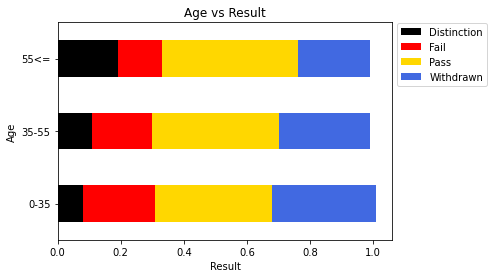

In [11]:
#Results based on Age

age = studentInfo.groupby(['age_band'],as_index = False)
age_count = age['id_student'].count()
result_age = studentInfo.groupby(['age_band', 'final_result'],as_index = False)
result_age_count = result_age['id_student'].count()

merge = pd.merge(age_count, result_age_count, on = 'age_band', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['age_band','final_result', '_']]

merge.set_index(['age_band','final_result']).unstack().plot(kind = 'barh',color=['black','red','gold','royalblue'], stacked = True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Age')
plt.xlabel('Result')
plt.title('Age vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

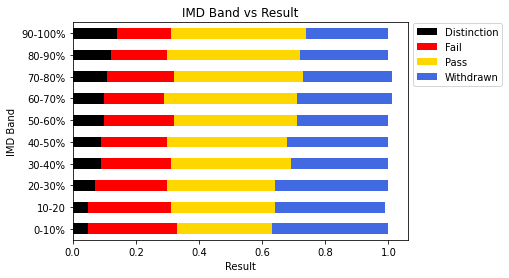

In [12]:
#Results based on IMD Band

import pandas as pd

imd = studentInfo.groupby(['imd_band'],as_index = False)
imd_count = imd['id_student'].count()
result_imd = studentInfo.groupby(['imd_band', 'final_result'],as_index = False)
result_imd_count = result_imd['id_student'].count()

merge = pd.merge(imd_count, result_imd_count , on = 'imd_band', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['imd_band','final_result', '_']]

merge.set_index(['imd_band','final_result']).unstack().plot(kind="barh",color=['black','red','gold','royalblue'], stacked = True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('IMD Band')
plt.xlabel('Result')
plt.title('IMD Band vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

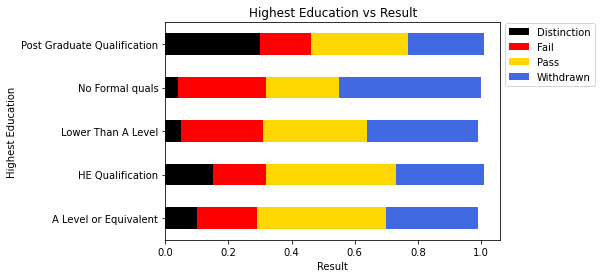

In [13]:
#Results based on Highest Education

education = studentInfo.groupby(['highest_education'],as_index = False)
education_count = education['id_student'].count()
result_education = studentInfo.groupby(['highest_education', 'final_result'],as_index = False)
result_education_count = result_education['id_student'].count()

merge = pd.merge(education_count, result_education_count , on = 'highest_education', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['highest_education','final_result', '_']]

merge.set_index(['highest_education','final_result']).unstack().plot(kind = 'barh',color=['black','red','gold','royalblue'], stacked = True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Highest Education')
plt.xlabel('Result')
plt.title('Highest Education vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

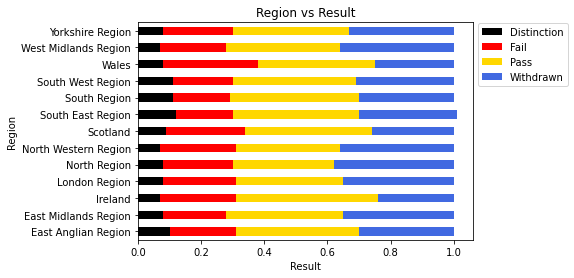

In [14]:
#Results based on Region
#import pandas as pd

region = studentInfo.groupby(['region'],as_index = False)
region_count = region['id_student'].count()
result_region = studentInfo.groupby(['region', 'final_result'],as_index = False)
result_region_count = result_region['id_student'].count()

merge = pd.merge(region_count, result_region_count , on = 'region', how = 'left')
merge['_'] = round((merge['id_student_y']/merge['id_student_x']), 2)
merge = merge[['region','final_result', '_']]

merge.set_index(['region','final_result']).unstack().plot(kind="barh",color=['black','red','gold','royalblue'], stacked=True)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylabel('Region')
plt.xlabel('Result')
plt.title('Region vs Result')
plt.legend(['Distinction','Fail', 'Pass', 'Withdrawn'], loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

In [15]:
data_studentInfo=pd.read_csv("./dataset/anonymised_data/studentInfo.csv")
print("Number of data points in studentInfo.csv",data_studentInfo.shape[0])

Number of data points in studentInfo.csv 32593


In [16]:
columns_info=data_studentInfo.columns
data_studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [17]:
data_studentInfo[data_studentInfo["imd_band"]=='?'].shape
mode_imd=stats.mode(data_studentInfo["imd_band"].values)[0][0]

for ind in range(0,data_studentInfo.shape[0]):
    
    if data_studentInfo.iloc[[ind]]["imd_band"].values[0]=='?':
        data_studentInfo.at[ind,"imd_band"]=mode_im

In [18]:
cat_columns=data_studentInfo.columns[data_studentInfo.dtypes==object].tolist()
cat_columns.remove("final_result")

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for arg in cat_columns:    
    le.fit(data_studentInfo[arg].values)    
    data_studentInfo[arg]=le.transform(data_studentInfo[arg])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data_studentInfo["final_result"].values)

clases={}
for arg in data_studentInfo["final_result"].unique():   
    clases[arg]=le.transform([arg])[0]
    
data_studentInfo["final_result"]=le.transform(data_studentInfo["final_result"])
print(clases)

data_studentInfo.pop("id_student")
data_studentInfo.head()

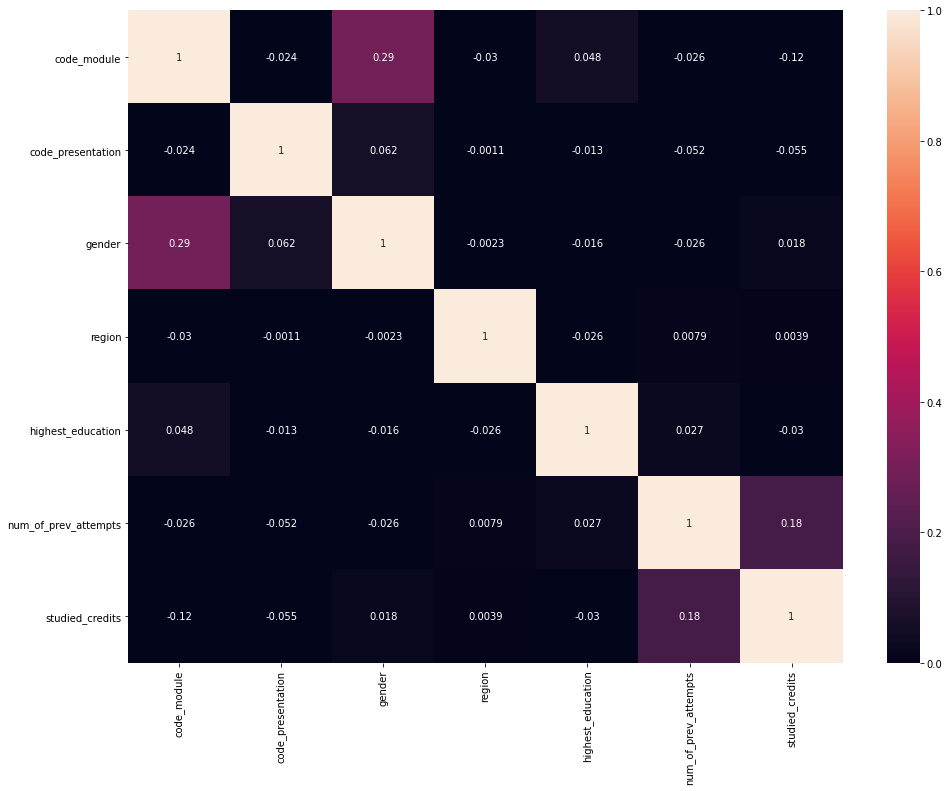

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import copy

x_clmns=list(columns_info.values)
remove_clmns=["final_result","id_student"]

for arg in remove_clmns:
    x_clmns.remove(arg)   

y_clmns=["final_result"]

dum=copy.deepcopy(x_clmns)
dum.append("final_result")

plt.figure(figsize=(16,12))
sns.heatmap(data_studentInfo[dum].corr(), annot = True, vmin = 0)
plt.show()

#Models

In [85]:
assessments = pd.read_csv('./dataset/anonymised_data/assessments.csv')
courses = pd.read_csv('./dataset/anonymised_data/courses.csv')
studentAssessment = pd.read_csv('./dataset/anonymised_data/studentAssessment.csv')
studentInfo = pd.read_csv('./dataset/anonymised_data/studentInfo.csv')
studentRegistration = pd.read_csv('./dataset/anonymised_data/studentRegistration.csv')
studentVle = pd.read_csv('./dataset/anonymised_data/studentVle.csv', nrows=999999)
vle = pd.read_csv('./dataset/anonymised_data/vle.csv')

In [86]:
studentVleGrouped = studentVle.drop(columns=['id_site', 'date'])

In [87]:
studentVleGrouped=studentVleGrouped.groupby(['code_module', 'code_presentation','id_student'])['sum_click'].agg('sum')

In [88]:
#studentInfoWithoutDemo = studentInfo.drop(columns=['gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability'])

In [89]:
df_final = studentInfo.merge(studentAssessment,on=['id_student'])
df_final = df_final.merge(studentRegistration,on=['id_student','code_module','code_presentation'])
df_final = df_final.merge(studentVleGrouped,on=['id_student','code_module','code_presentation'])
# df_final
df_final['final_result'].value_counts()

Pass           18457
Fail            4933
Distinction     3806
Withdrawn       2460
Name: final_result, dtype: int64

In [90]:
df_final = df_final.drop(['date_unregistration'],axis =1) # too many NaN values

In [91]:
df_final.dropna(inplace=True)
df_final['final_result'].value_counts()

Pass           18190
Fail            4884
Distinction     3714
Withdrawn       2404
Name: final_result, dtype: int64

In [92]:
#For decision_tree =>accuracy=92%
#df_final=df_final.drop(columns=['date_submitted','date_registration','studied_credits','id_assessment','region','gender','code_module'])

In [93]:
#For random_forest=>accuracy=96%
df_final=df_final.drop(columns=['date_submitted','studied_credits','id_assessment','code_module','code_presentation','num_of_prev_attempts','is_banked','date_registration','sum_click'])

In [94]:
#For gradient boost and knn =>accuracy=78
#df_final=df_final.drop(columns=['date_submitted','studied_credits','id_assessment','region','gender'])

In [95]:
#df_final=df_final.drop(columns=['code_module','gender','disability'])

In [96]:
df_final.head()

,id_student,gender,region,highest_education,imd_band,age_band,disability,final_result,score
0,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,N,Pass,78.0
1,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,N,Pass,85.0
2,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,N,Pass,80.0
3,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,N,Pass,85.0
4,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,N,Pass,82.0


In [97]:
# Converting the final table to catgorical data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_final = df_final.apply(le.fit_transform)

In [98]:
df_final

,id_student,gender,region,highest_education,imd_band,age_band,disability,final_result,score
0,1,1,0,1,9,2,0,2,73
1,1,1,0,1,9,2,0,2,80
2,1,1,0,1,9,2,0,2,75
3,1,1,0,1,9,2,0,2,80
4,1,1,0,1,9,2,0,2,77
...,...,...,...,...,...,...,...,...,...
29651,3671,0,4,2,0,0,0,1,95
29652,3671,0,4,2,0,0,0,1,95
29653,3671,0,4,2,0,0,0,1,75
29654,3671,0,4,2,0,0,0,1,55


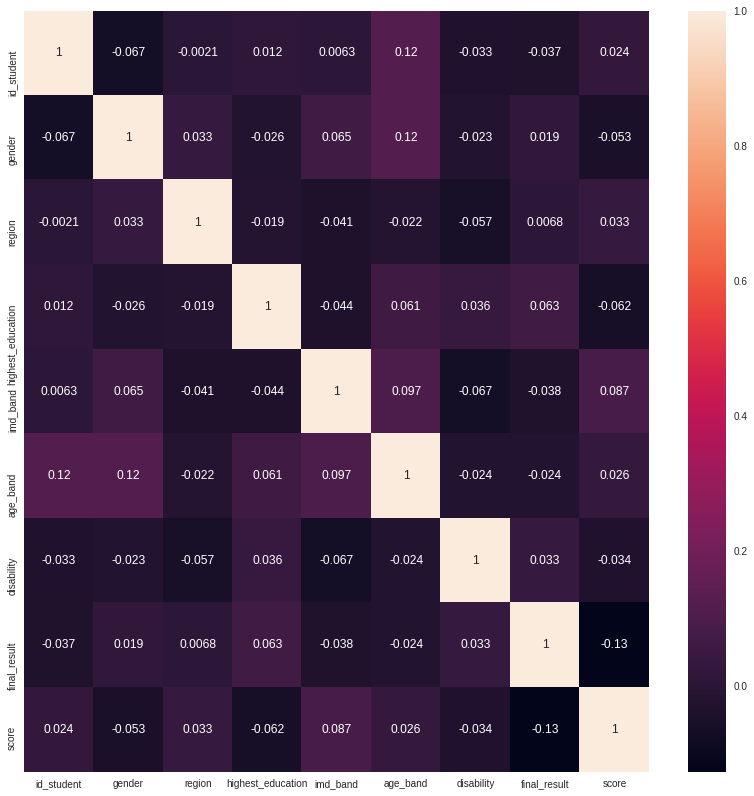

In [99]:
plt.figure(figsize=(14,14))
cor=df_final.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [100]:
#Feature selection
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df_final.loc[:, df_final.columns != 'final_result']
y = df_final['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

#Univariate Selection
bestfeatures = SelectKBest(score_func=chi2,k=8)
fit = bestfeatures.fit(xTrain,yTrain)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(xTrain.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 10 best features

            Features         Score
0         id_student  59775.146738
7              score   6927.474934
4           imd_band    690.232780
3  highest_education    402.756971
5           age_band    161.141418
6         disability    144.891041
2             region     62.756948
1             gender     10.629031


In [101]:
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

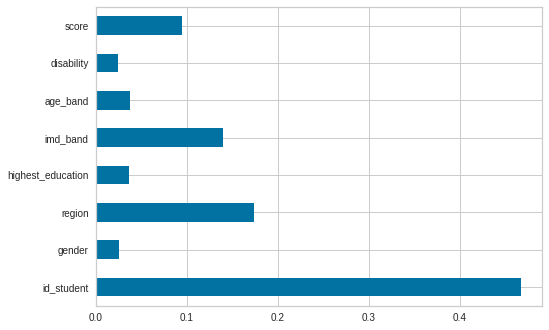

Accuracy:0.812 



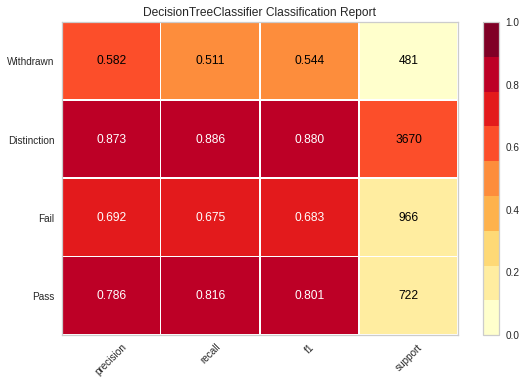

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [102]:
# Decision Tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

X = df_final.loc[:, df_final.columns != 'final_result']
y = df_final['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.80)

dt = tree.DecisionTreeClassifier(criterion='gini')
dt = dt.fit(xTrain, yTrain)
feat_importances = pd.Series(dt.feature_importances_, index=xTrain.columns)
feat_importances.plot(kind='barh')
plt.show()
train_pred = dt.predict(xTrain)
test_pred = dt.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)),"\n")
classes = ['Pass','Fail','Distinction','Withdrawn']
visualizer = ClassificationReport(dt, classes=classes, support=True)
visualizer.fit(xTrain, yTrain)
visualizer.score(xTest, yTest)
visualizer.show()

Accuracy:0.934


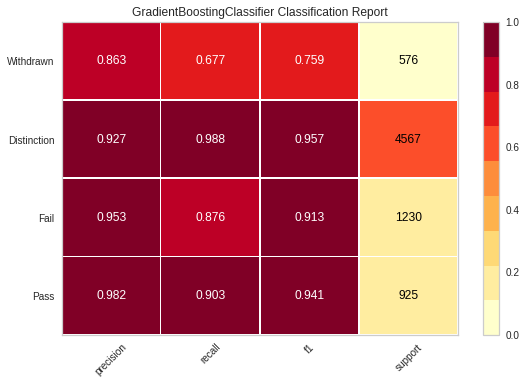

<AxesSubplot:title={'center':'GradientBoostingClassifier Classification Report'}>

In [103]:
# Gradient Boosting Classification
from sklearn.ensemble import GradientBoostingClassifier

X = df_final.loc[:, df_final.columns != 'final_result']
y = df_final['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.75)

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=0, loss='deviance')
gb = gb.fit(xTrain, yTrain)
print("Accuracy:{0:.3f}".format(gb.score(xTest, yTest)))
classes = ['Pass','Fail','Distinction','Withdrawn']
visualizer = ClassificationReport(gb, classes=classes, support=True,force_model=True)
visualizer.fit(xTrain, yTrain)
visualizer.score(xTest, yTest)
visualizer.show()

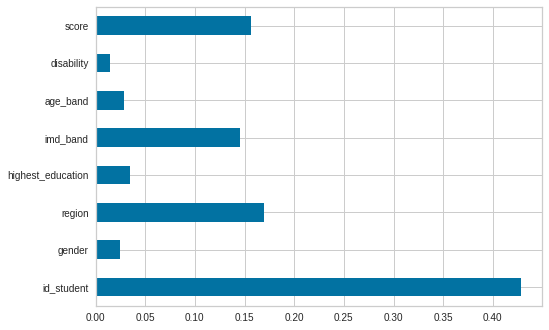

Accuracy:0.869 



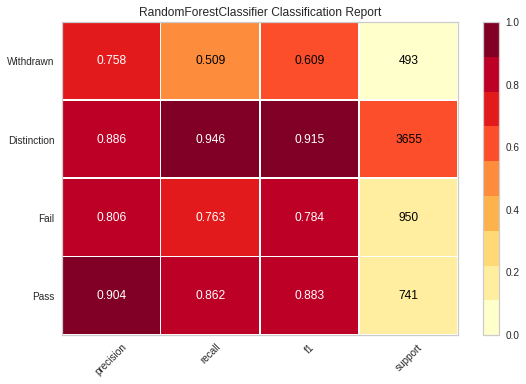

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [104]:
# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X = df_final.loc[:, df_final.columns != 'final_result']
y = df_final['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.80)
rf = RandomForestClassifier(n_estimators=10,random_state=33)
rf = rf.fit(xTrain, yTrain)
feat_importances = pd.Series(rf.feature_importances_, index=xTrain.columns)
feat_importances.plot(kind='barh')
plt.show()
train_pred = rf.predict(xTrain)
test_pred = rf.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)),"\n")
classes = ['Pass','Fail','Distinction','Withdrawn']
visualizer = ClassificationReport(rf, classes=classes, support=True)
visualizer.fit(xTrain, yTrain)
visualizer.score(xTest, yTest)
visualizer.show()

Accuracy:0.740 



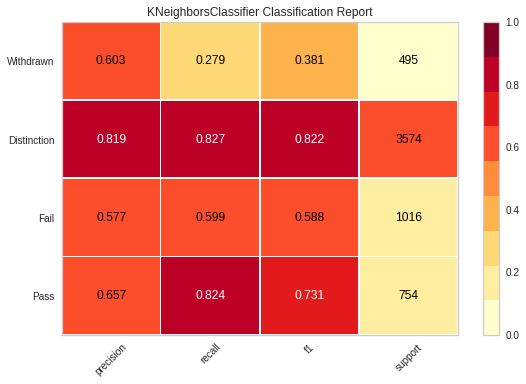

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [105]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = df_final.loc[:, df_final.columns != 'final_result']
y = df_final['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.8)

# Train the model using the training sets
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(xTrain,yTrain)

train_pred = knn.predict(xTrain)
test_pred = knn.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)),"\n")
classes = ['Pass','Fail','Distinction','Withdrawn']
visualizer = ClassificationReport(knn, classes=classes, support=True)
visualizer.fit(xTrain, yTrain)
visualizer.score(xTest, yTest)
visualizer.show()

# Model Evaluation

In [423]:
!pip install scikit-plot

In [424]:
!pip install yellowbrick

     |████████████████████████████████| 271 kB 74 kB/s eta 0:00:01


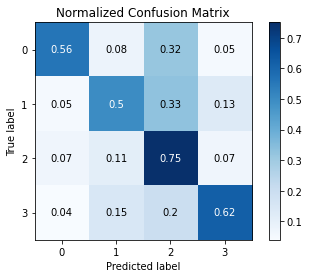

In [36]:
#Decision Tree
import scikitplot as skplt
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(dt, xTest, yTest)
skplt.metrics.plot_confusion_matrix(yTest, y_pred, normalize=True)

plt.show()

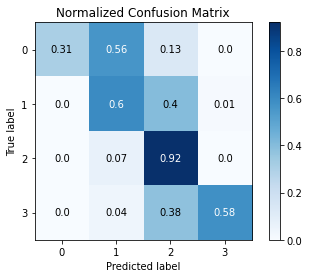

In [37]:
#Gradient Boosting
import numpy as np
import scikitplot as skplt
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(gb, xTest, yTest)
y_pred = np.absolute(y_pred)

skplt.metrics.plot_confusion_matrix(yTest, y_pred.round(), normalize=True)

plt.show()

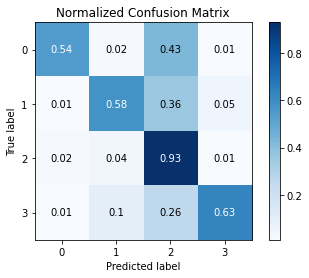

In [38]:
#Random Forest
import scikitplot as skplt
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(rf, xTest, yTest)
skplt.metrics.plot_confusion_matrix(yTest, y_pred, normalize=True)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9073e84d-8e26-4cff-a45a-284b3d07e9b8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>